# Predict Credit Default

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('../data/hmeq.csv')

In [3]:
df.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [4]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


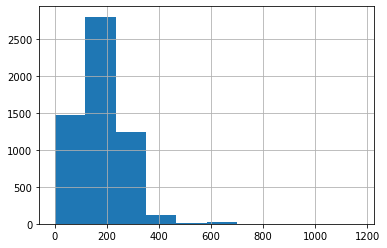

In [5]:
df['CLAGE'].hist()

In [6]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [7]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [8]:
def fill_na_model(df, target):
    
    df_ = df.copy()
    
    X = df_.drop(['BAD', 'DEROG', 'DELINQ'], axis=1)
    y = df_[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clf = GradientBoostingRegressor(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    return clf


def predict_na(df, target, clf=None):
    
    df_ = df.copy()
    
    df_train = df_[~df_[target].isna()]
    df_test = df_[df_[target].isna()]
    df_test_ = df_test.drop(columns=['BAD', 'DEROG', 'DELINQ'], axis=1)
    
    if clf == None:
        clf = fill_na_model(df_train, target)
        
    y_pred = clf.predict(df_test_)
    df_test[target] = y_pred
    df_new = pd.concat([df_train, df_test])
    
    return df_new, clf
    

In [19]:
def dummy_replace(df, column, prefix=None):
    
    df_ = df.copy()
    
    df_dummy = pd.get_dummies(df_[column], prefix=prefix)
    df_ = pd.concat([df_, df_dummy], axis=1)
    df_ = df_.drop(columns=[column], axis=1)
    
    return df_
   
def fill_nan(df): 
    
    df_ = df.copy()
    
    df_['MORTDUE'] = df_['MORTDUE'].fillna(df_['MORTDUE'].median())
    df_['VALUE'] = df_['VALUE'].fillna(df_['VALUE'].median())
    df_['REASON'] = df_['REASON'].fillna('Unknown')
    df_['JOB'] = df_['JOB'].fillna('Unknown')
    df_['YOJ'] = df_['YOJ'].fillna(df_['YOJ'].median())
    df_['CLAGE'] = df_['CLAGE'].fillna(df_['CLAGE'].median())
    df_['NINQ'] = df_['NINQ'].fillna(df_['NINQ'].median()) 
    df_['CLNO'] = df_['CLNO'].fillna(df_['CLNO'].median()) 
    df_['DEBTINC'] = df_['DEBTINC'].fillna(df_['DEBTINC'].median()) 
    
    df_['DEROG'] = df_['DEROG'].fillna(df_['DEROG'].mean()) 
    df_['DELINQ'] = df_['DELINQ'].fillna(df_['DELINQ'].mean()) 
    
    return df_


def feature_engineering(df):
    
    df_ = df.copy()
    
    df_['LOAN'] = np.log(df_['LOAN'])
    df_['MORTDUE'] = np.log(df_['MORTDUE'])
    df_['VALUE'] = np.log(df_['VALUE'])
    
    return df_


def data_cleaning(df, clf=None):
    
    df_ = df.copy()
    df_ = fill_nan(df_)
#     df_ = feature_engineering(df_)


    df_ = dummy_replace(df_, 'REASON', prefix='Reason')
    df_ = dummy_replace(df_, 'JOB', prefix='Job')
    
#     df_, clf_derog = predict_na(df_, 'DEROG', clf=clf)
#     df_, clf_delinq = predict_na(df_, 'DELINQ', clf=clf)
    
    return df_

In [20]:
df_ = data_cleaning(df)

In [21]:
df_.head(5)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,Reason_DebtCon,Reason_HomeImp,Reason_Unknown,Job_Mgr,Job_Office,Job_Other,Job_ProfExe,Job_Sales,Job_Self,Job_Unknown
0,1,1100,25860.0,39025.0,10.5,0.00000,0.000000,94.366667,1.0,9.0,...,0,1,0,0,0,1,0,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.00000,2.000000,121.833333,0.0,14.0,...,0,1,0,0,0,1,0,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.00000,0.000000,149.466667,1.0,10.0,...,0,1,0,0,0,1,0,0,0,0
3,1,1500,65019.0,89235.5,7.0,0.25457,0.449442,173.466667,1.0,20.0,...,0,0,1,0,0,0,0,0,0,1
4,0,1700,97800.0,112000.0,3.0,0.00000,0.000000,93.333333,0.0,14.0,...,0,1,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X = df_.drop(['BAD'], axis=1)
y = df_['BAD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



C:\Users\srema\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.8195221148957804
F1 score: 0.43381180223285487
Precision score: 0.6974358974358974
Recall score: 0.3148148148148148


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.7819013726487036
F1 score: 0.0272108843537415
Precision score: 0.6666666666666666
Recall score: 0.013888888888888888


In [178]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.8937468225724453
F1 score: 0.7035460992907802
Precision score: 0.9084249084249084
Recall score: 0.5740740740740741


In [171]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy score:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

Accuracy score: 0.9161159125571937
F1 score: 0.7376788553259142
Precision score: 0.90625
Recall score: 0.6219839142091153
